In [1]:
from snn_stdp import SNN_STDP
#from hwsnn.datasets.sequential_datasets import PoissonDataloader
from hwsnn.utils.loaders import DatasetLoader
from torch.utils.data import DataLoader
from hwsnn.utils.utils import propagate_batch
import torch

c:\Users\saucedo\anaconda3\envs\deepsnn\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Trato de implementar STDP por medio de 'trazas sinápticas' \
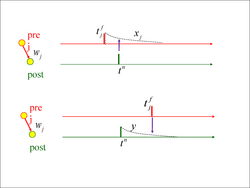
http://www.scholarpedia.org/article/Spike-timing_dependent_plasticity

In [2]:
%load_ext autoreload
%autoreload 2

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Running on: {}'.format(device))

batch_size=1

total_time = 100

rate = 100

dataset = 'nmnist784' 
total_time = 50
batch_size = 1 # lr=1e-4
DL = DatasetLoader(dataset=dataset, caching='memory', num_workers=0, batch_size=batch_size, total_time=total_time)
test_loader, train_loader = DL.get_dataloaders()

#test_loader = DataLoader(dataset, batch_size=batch_size)

Running on: cuda:0
C:\Users\saucedo\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Datasets\tonic_datasets\nmnist784_dictionary.json


In [3]:
snn = SNN_STDP(dataset, structure=(10,1), tau_m='normal', win=total_time, loss_fn='sum', debug=True,
               batch_size=batch_size, device='cpu')
snn

[INFO] Delays: tensor([0])


SNN_STDP(
  (criterion): MSELoss()
  (f0_i): Linear(in_features=784, out_features=10, bias=False)
  (f1_o): Linear(in_features=10, out_features=10, bias=False)
)

Without stdp

In [4]:
snn.stdp_scale = 0.0
snn.stdp_alpha = 0.7

<AxesSubplot: xlabel='input', ylabel='output'>

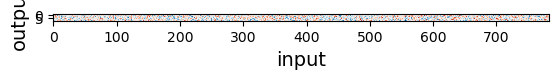

In [5]:
from hwsnn.utils.visualization_utils import plot_param
plot_param(snn.f0_i, mode='2D')

In [6]:
propagate_batch(snn, test_loader)

<AxesSubplot: xlabel='input', ylabel='output'>

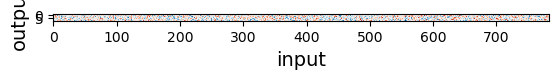

In [7]:
plot_param(snn.f0_i, mode='2D')

<AxesSubplot: xlabel='Time (ms)', ylabel='Neuron'>

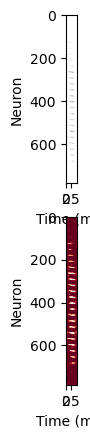

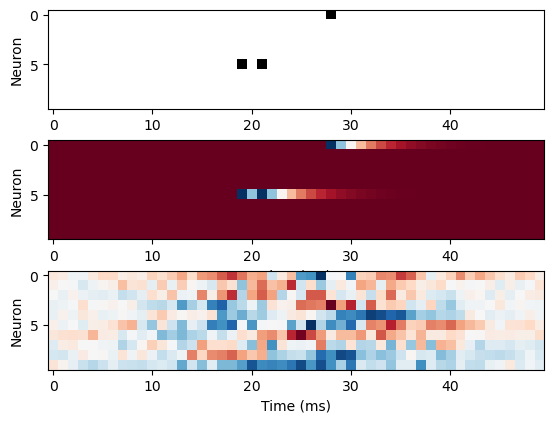

In [8]:
from hwsnn.utils.visualization_utils import plot_raster
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(211)
plot_raster(snn, 'input', 1, mode='spikes')
plt.subplot(212)
plot_raster(snn, 'input', 1, mode='traces')

plt.figure()
plt.subplot(311)
plot_raster(snn, 'f1', 1, mode='spikes')
plt.subplot(312)
plot_raster(snn, 'f1', 1, mode='traces')
plt.subplot(313)
plot_raster(snn, 'f1', 1, mode='mems')

With stdp

In [9]:
snn.stdp_scale = 0.05
snn.stdp_alpha = 0.7

<AxesSubplot: xlabel='input', ylabel='output'>

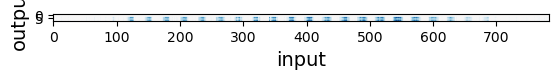

In [10]:

for x in range(5):

    propagate_batch(snn, test_loader)

plot_param(snn.f0_i, mode='2D')

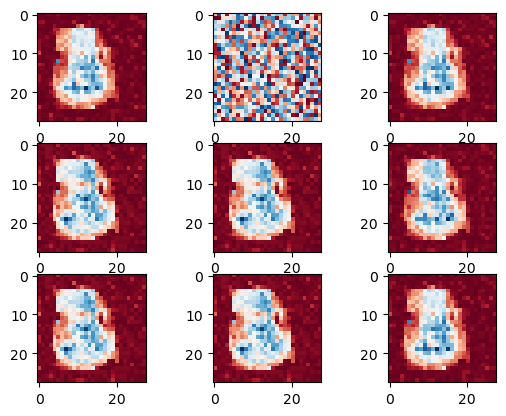

In [11]:
from hwsnn.utils.visualization_utils import plot_per_neuron
plot_per_neuron(snn.f0_i)

<AxesSubplot: xlabel='Time (ms)', ylabel='Neuron'>

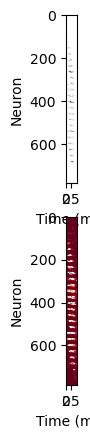

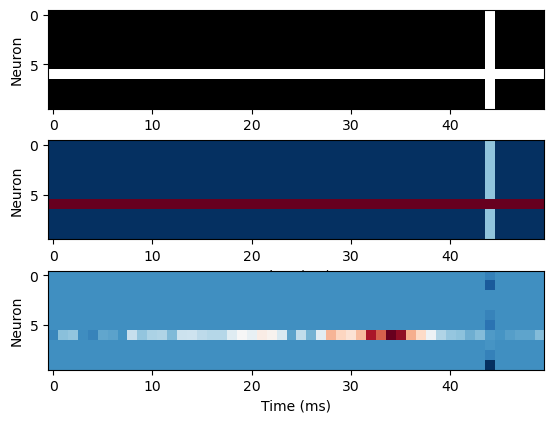

In [17]:
from hwsnn.utils.visualization_utils import plot_raster
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(211)
plot_raster(snn, 'input', 1, mode='spikes')
plt.subplot(212)
plot_raster(snn, 'input', 1, mode='traces')

plt.figure()
plt.subplot(311)
plot_raster(snn, 'f1', 1, mode='spikes')
plt.subplot(312)
plot_raster(snn, 'f1', 1, mode='traces')
plt.subplot(313)
plot_raster(snn, 'f1', 1, mode='mems')